In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
customer_df = pd.read_csv("data\customers_dataset.csv")
geolocation_df = pd.read_csv("data\geolocation_dataset.csv")
order_items_df = pd.read_csv("data\order_items_dataset.csv")
order_payments_df = pd.read_csv("data\order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data\order_reviews_dataset.csv")
orders_df = pd.read_csv("data\orders_dataset.csv")
product_category_translation_df = pd.read_csv("data\product_category_name_translation.csv")
products_df = pd.read_csv("data\products_dataset.csv")
sellers_df = pd.read_csv("data\sellers_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mvr\AppData\Local\Temp\ipykernel_7952\2389878757.py:1: SyntaxWarning: invalid escape sequen

## Data Preparation

In [4]:
def info_table(df):
    print('--- 10 Baris Teratas ---')
    display(df.head(10))
    print('--- Info Table ---\n')
    df.info()
    print('\n--- Jumlah Missing Value ---')
    display(df.isnull().sum())

In [5]:
order_payments_df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


In [6]:
unique_customers = customer_df['customer_id'].nunique()
unique_sellers = sellers_df['seller_id'].nunique()

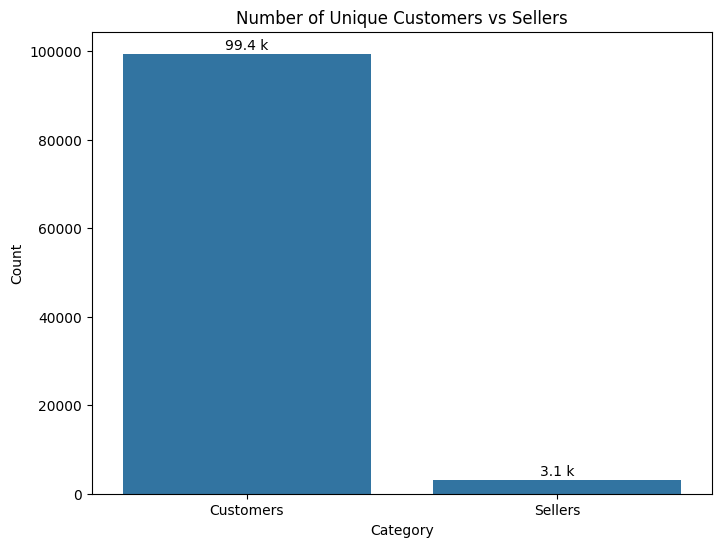

In [15]:
data = pd.DataFrame({'Category': ['Customers', 'Sellers'], 
                     'Count': [unique_customers, unique_sellers]})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Category', y='Count', data=data, lw=3)
plt.title('Number of Unique Customers vs Sellers')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1000,
            f'{round(height/1000,1):,} k', ha="center")

plt.show()

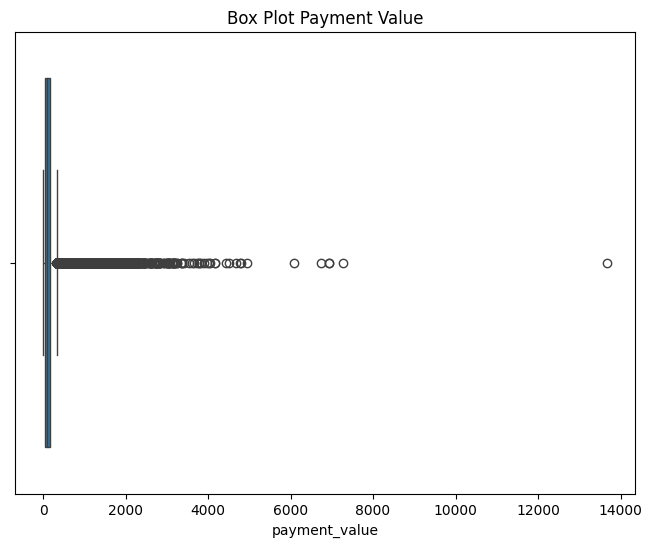

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='payment_value', data=order_payments_df)
plt.title('Box Plot Payment Value')
plt.show()

### 1. Perusahaan ingin mengetahui trend pertumbuhan penjualan (dalam persen)

In [9]:
# menggabungkan table order_items_df dengan orders_df menggunakan skema inner join
growth_month = pd.merge(order_payments_df, orders_df, on='order_id', how='inner')

# mengambil kolom tertentu
growth_month = growth_month.loc[:, ['order_purchase_timestamp', 'payment_value']]

# menghapus data duplikat pada kolom order_id
# growth_month.nunique()
# growth_month = growth_month.drop_duplicates(subset='order_id', ignore_index=True)

# memghapus data missing value
# growth_month.isnull().sum()
# growth_month = growth_month.dropna()

# mengalikan kolom price dengan order_item_id
# growth_month['price'] = growth_month['price'] * growth_month['order_item_id']
# growth_month.drop('order_item_id', axis=1, inplace=True)

# preprocessing kolom order_purchase_timestamp
## ubah tipe data
growth_month['order_purchase_timestamp'] = pd.to_datetime(growth_month['order_purchase_timestamp'])

## ekstraksi data order_purchase_timestamp ke dalam bulan
growth_month['year_month'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.to_period('M').dt.to_timestamp()
growth_month.drop('order_purchase_timestamp', axis=1, inplace=True)
growth_month.sort_values(by='year_month', ignore_index=True, inplace=True)

# menghitung total pendapatan perbulan
revenue_per_month = growth_month.groupby('year_month')['payment_value'].sum().reset_index()
revenue_per_month = revenue_per_month.loc[3:22]
revenue_per_month['year_month'] = revenue_per_month['year_month'].dt.to_period('M').astype('str')

# menghitung persentase pertumbuhan menggunakan metrics growth rate
revenue_per_month['growth_percentage'] = ((revenue_per_month['payment_value'] - revenue_per_month['payment_value'].shift(1)) / revenue_per_month['payment_value'].shift(1)) * 100

In [8]:
revenue_per_month

,year_month,payment_value,growth_percentage
3,2017-01,127625.82,NaN
4,2017-02,268773.43,110.594870
5,2017-03,411370.07,53.054590
6,2017-04,363715.95,-11.584246
7,2017-05,573234.67,57.605040
8,2017-06,495173.92,-13.617591
9,2017-07,619055.74,25.017840
10,2017-08,677745.16,9.480474
11,2017-09,646130.36,-4.664703
12,2017-10,731598.29,13.227660


### 3. Perusahaan ingin melihat region mana yang menjadi kunci penjualan

In [23]:
# menggabungkan table cust_df dengan orders_df menggunakan skema outer join
cust_order_region = pd.merge(customer_df, orders_df, on='customer_id', how='inner')
cust_order_region = pd.merge(cust_order_region, order_items_df, on='order_id', how='inner')

# mengambil kolom tertentu
cust_order_region['price'] = cust_order_region['price'] * cust_order_region['order_item_id']
cust_order_region = cust_order_region.loc[:, ['customer_id', 'customer_city', 'price']]

# menghapus data missing value
# cust_order_region.dropna(inplace=True)

# menghitung total pembelian tiap customer
cust_order_region = cust_order_region.groupby(['customer_id', 'customer_city'])['price'].sum().reset_index()

# menghitung total pendapat perkota
sales_city = cust_order_region.groupby('customer_city')['price'].sum().reset_index()
sales_city.sort_values(by='price', ascending=False, ignore_index=True)

,customer_city,price
0,sao paulo,2199609.73
1,rio de janeiro,1167734.25
2,belo horizonte,387535.24
3,brasilia,333780.40
4,curitiba,246378.03
...,...,...
4105,jenipapo de minas,7.48
4106,santo antonio do rio abaixo,6.00
4107,senador jose porfirio,6.00
4108,sabaudia,5.90


### 4. Perusahaan ingin mengetahui RCR (Return Customer Rate)

In [16]:
return_cust_rate = pd.merge(customer_df, orders_df, on='customer_id', how='outer')
return_cust_rate = pd.merge(return_cust_rate, order_items_df, on='order_id', how='outer')

# mengambil kolom tertentu
return_cust_rate = return_cust_rate.loc[:, ['customer_id', 'order_purchase_timestamp']]

# mengubah kolom order_purchase_timestamp menjadi datetime
return_cust_rate['order_purchase_timestamp'] = pd.to_datetime(return_cust_rate['order_purchase_timestamp'])

# ekstraksi data order_purchase_timestamp ke dalam bulan
return_cust_rate['year_month'] = pd.to_datetime(return_cust_rate['order_purchase_timestamp'].dt.strftime('%Y-%m'))
return_cust_rate.drop('order_purchase_timestamp', axis=1, inplace=True)
return_cust_rate.sort_values(by='year_month', ignore_index=True, inplace=True)
return_cust_rate = return_cust_rate.loc[(return_cust_rate['year_month'] >= '2017-01')]
                                        #  & (return_cust_rate['year_month'] <= '2018-01')]

# menghitung jumlah pelanggan berulang
repeat_customers = return_cust_rate.groupby('customer_id').filter(lambda x: len(x)>1)
num_repeat_cust_monthly = repeat_customers.groupby('year_month')['customer_id'].count().reset_index()

# menghitung total pelanggan perbulan
total_cust_monthly = return_cust_rate.groupby('year_month')['customer_id'].nunique().reset_index()

# menghitung RCR
return_cust_rate.drop('customer_id', axis=1, inplace=True) # menghapus customer_id yang lama agar year_month bisa menjadi kolom unik
return_cust_rate['year_month'] = return_cust_rate['year_month'].dt.to_period('M').astype('str')
return_cust_rate = return_cust_rate.drop_duplicates(subset='year_month', ignore_index=True)
return_cust_rate['RCR'] = (num_repeat_cust_monthly['customer_id'] / total_cust_monthly['customer_id']) * 100

In [9]:
return_cust_rate

,year_month,RCR
0,2017-01,32.375000
1,2017-02,21.404494
2,2017-03,23.191648
3,2017-04,21.672213
4,2017-05,22.567568
5,2017-06,19.753467
6,2017-07,23.596622
7,2017-08,24.359270
8,2017-09,23.197200
9,2017-10,26.970417


### 5. Perusahaan ingin mengetahui AOV (Average Order Value)

In [18]:
products_translation_df = pd.merge(products_df, product_category_translation_df, how='left', on='product_category_name')

In [27]:
order_value = pd.merge(order_items_df, order_payments_df, on='order_id', how='inner')
order_value = pd.merge(order_value, products_translation_df[['product_id', 'product_category_name_english']], 
                       how='inner', on='product_id')
order_value = order_value.loc[:, ['product_id', 'product_category_name_english', 'payment_value']]

## ekstraksi data order_purchase_timestamp ke dalam bulan

# menghitung total pendapatan perbulan
order_pivot = pd.pivot_table(order_value, values=['product_id', 'payment_value'],
                              index=['product_category_name_english'],
                              aggfunc={'product_id': 'count', 
                                       'payment_value': 'sum'},  # Gunakan list di sini
                              fill_value=0).reset_index()

order_pivot['aov'] = order_pivot['payment_value'] / order_pivot['product_id']
order_pivot

,product_category_name_english,payment_value,product_id,aov
0,agro_industry_and_commerce,118730.61,252,471.153214
1,air_conditioning,91170.66,302,301.889603
2,art,30992.93,219,141.520228
3,arts_and_craftmanship,2326.17,24,96.923750
4,audio,60324.62,380,158.749000
...,...,...,...,...
66,stationery,317440.07,2617,121.299224
67,tablets_printing_image,10042.93,87,115.435977
68,telephony,486882.05,4721,103.131127
69,toys,619037.69,4273,144.871914


In [25]:
order_value = pd.merge(order_items_df, order_payments_df, on='order_id', how='inner')
order_value = pd.merge(order_value, products_translation_df[['product_id', 'product_category_name_english']], 
                       how='inner', on='product_id')
order_value = order_value.loc[:, ['product_id', 'product_category_name_english', 'payment_value']]

# menghapus missing value dan kolom price
# order_value.dropna(inplace=True)
# order_value.drop('price', axis=1, inplace=True)

# preprocessing kolom order_purchase_timestamp
## ubah tipe data
order_value['order_purchase_timestamp'] = pd.to_datetime(order_value['order_purchase_timestamp'])

## ekstraksi data order_purchase_timestamp ke dalam bulan
order_value['year_month'] = pd.to_datetime(order_value['order_purchase_timestamp']).dt.to_period('M').dt.to_timestamp()
order_value.drop('order_purchase_timestamp', axis=1, inplace=True)
order_value.sort_values(by='year_month', ignore_index=True, inplace=True)

# menghitung total pendapatan perbulan
order_value = order_value.drop_duplicates(subset='order_id', ignore_index=True)
aov = order_value.groupby('year_month')['order_id'].count().reset_index()
aov['year_month'] = aov['year_month'].dt.to_period('M').astype('str')
aov = aov.loc[3:22]

# Menghitung AOV
aov['AOV'] = revenue_per_month['payment_value'] / aov['order_id']
aov.drop('order_id', axis=1, inplace=True)
aov

,year_month,AOV
3,2017-01,161.756426
4,2017-02,155.091420
5,2017-03,155.762995
6,2017-04,152.118758
7,2017-05,156.621495
8,2017-06,153.924128
9,2017-07,155.972724
10,2017-08,157.872155
11,2017-09,152.281490
12,2017-10,160.157244


### 6. Mengetahui kategori produk yang paling banyak terjual

In [26]:
pd.merge(products_df, product_category_translation_df, how='left', on='product_category_name').isnull().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [27]:
products_translation_df = pd.merge(products_df, product_category_translation_df, how='left', on='product_category_name')

product_top = pd.merge(order_items_df, products_translation_df, on='product_id', how='outer')
product_top = product_top.loc[:, ['order_item_id', 'product_category_name_english']]

# menghitung product terbanyak dibeli
product_top = product_top.groupby(['product_category_name_english'])['order_item_id'].sum().reset_index()
product_top.sort_values(by='order_item_id', ascending=False, ignore_index=True, inplace=True)

In [28]:
product_top

,product_category_name_english,order_item_id
0,bed_bath_table,13665
1,furniture_decor,11540
2,health_beauty,11081
3,sports_leisure,9932
4,computers_accessories,9874
...,...,...
66,arts_and_craftmanship,26
67,cds_dvds_musicals,16
68,la_cuisine,16
69,fashion_childrens_clothes,8


### 7. Mengetahui korelasi antara review score dengan tingkat pendapatan

In [ ]:
ratings = pd.merge(pd.merge(order_items_df[['order_id', 'seller_id']], order_payments_df[['order_id', 'payment_value']],
                 how='inner', on='order_id'),
        order_reviews_df[['order_id', 'review_score']],
        how='inner', on='order_id')

In [ ]:
ratings = ratings.drop_duplicates()

In [ ]:
rating_pivot = pd.pivot_table(ratings,
                              values=['order_id', 'seller_id', 'payment_value'],
                              index=['review_score'],
                              aggfunc={'order_id': 'nunique', 
                                       'seller_id': 'nunique', 
                                       'payment_value': 'sum'},  # Gunakan list di sini
                              fill_value=0).reset_index()

# Grafik

### Nomor 1

posx and posy should be finite values
posx and posy should be finite values


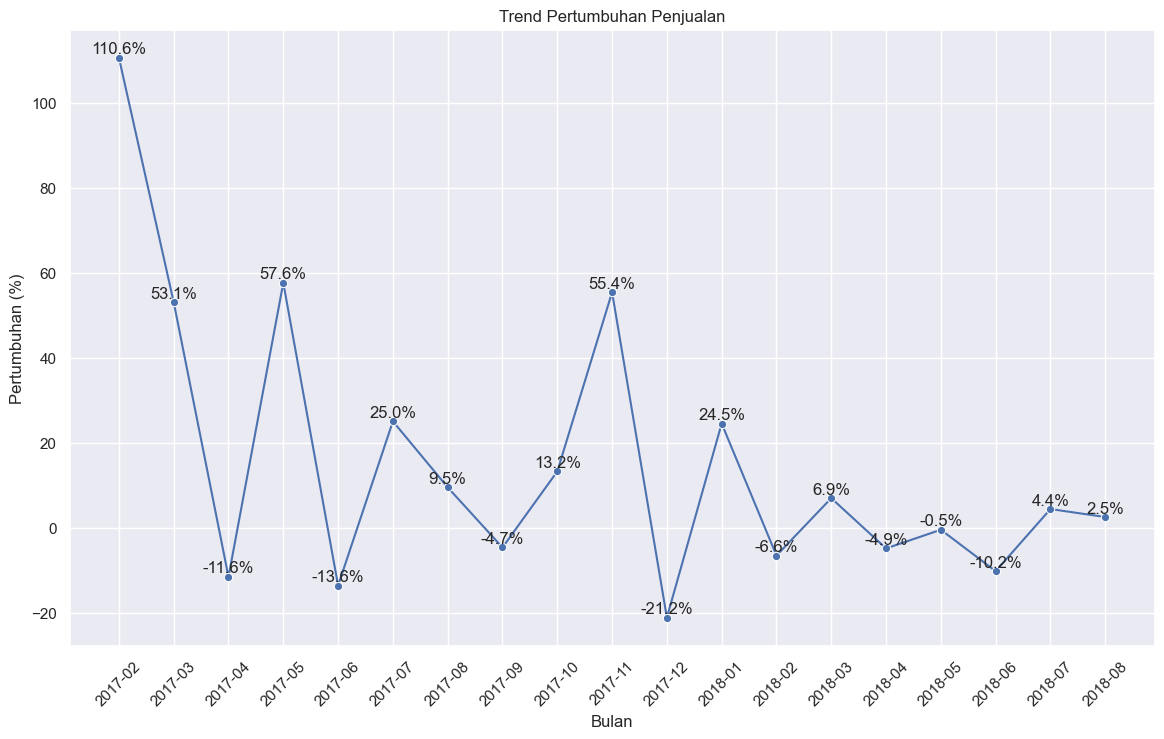

In [36]:
#plt.plot(revenue_per_month['year_month'], revenue_per_month['growth_percentage'], marker='o')
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.lineplot(x=revenue_per_month['year_month'], y=revenue_per_month['growth_percentage'], marker='o')
plt.title('Trend Pertumbuhan Penjualan')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.ylabel('Pertumbuhan (%)')

for x, y in zip(revenue_per_month['year_month'], revenue_per_month['growth_percentage']):
    label = f'{y:.1f}%' 
    ax.text(x, y + 1, label, ha='center') 

plt.show()

### Nomor 2

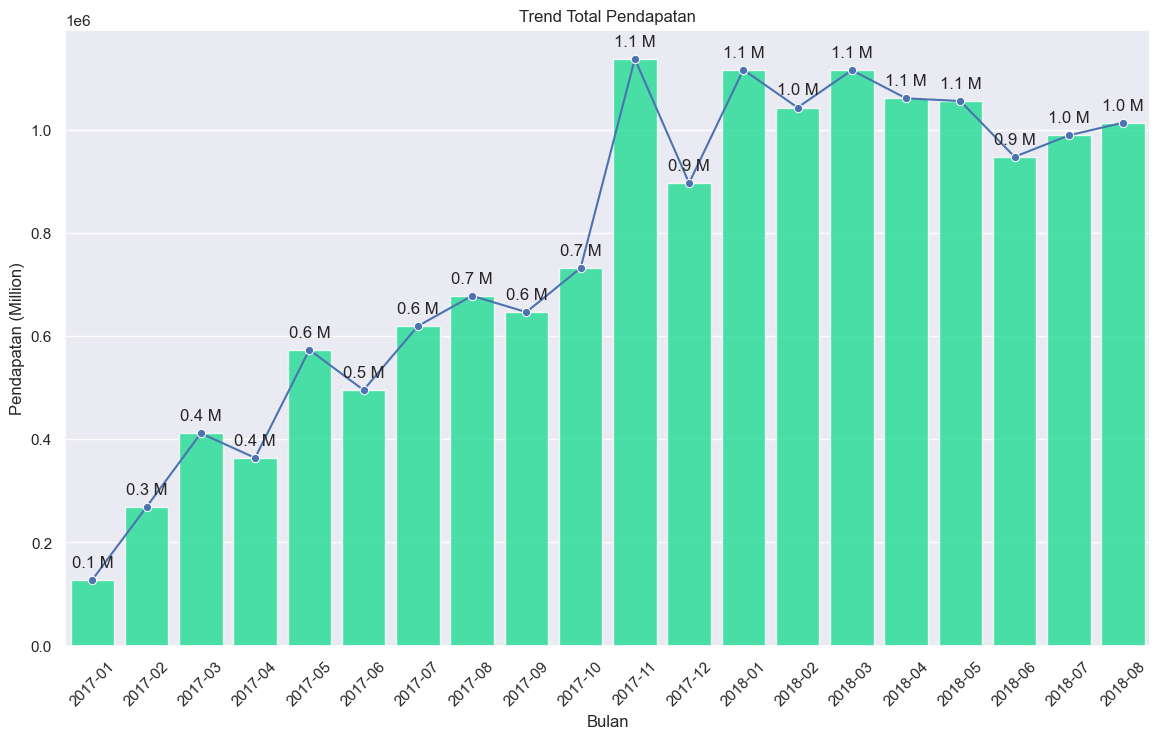

In [37]:
sns.set(rc={'figure.figsize':(14,8)})
sns.lineplot(x=revenue_per_month['year_month'], y=revenue_per_month['payment_value'], marker='o')
ax=sns.barplot(data = revenue_per_month, x='year_month', y='payment_value', alpha=0.8 ,color='mediumspringgreen', dodge=False)
    
plt.title('Trend Total Pendapatan')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.ylabel('Pendapatan (Million)')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 25000,
            f'{round(height/1000000,1):,} M', ha="center")

plt.show()

### Nomor 3

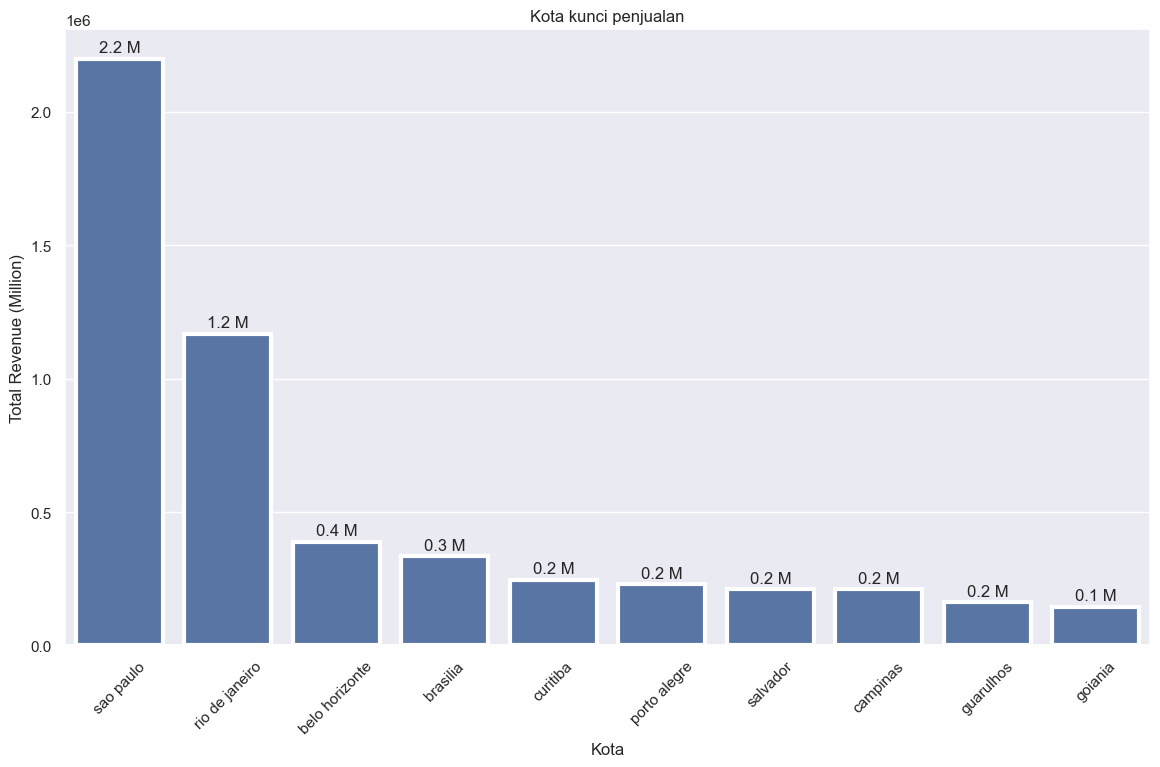

In [38]:
sns.set(rc={'figure.figsize':(14,8)})
ax=sns.barplot(data = sales_city, x='customer_city', y='price', lw=3,
            order=sales_city.sort_values('price', ascending=False).head(10)['customer_city'])
plt.title('Kota kunci penjualan')
plt.xlabel('Kota')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue (Million)')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 25000,
            f'{round(height/1000000,1):,} M', ha="center")
    
plt.show()

### Nomor 4

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


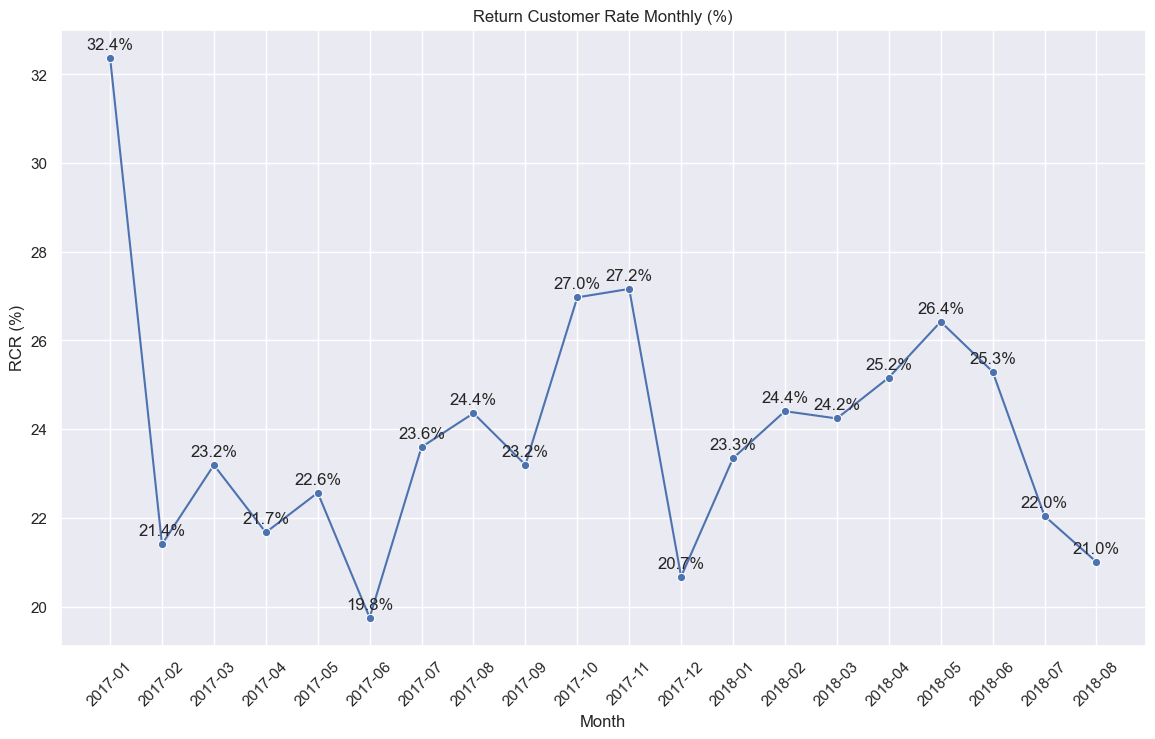

In [17]:
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.lineplot(x=return_cust_rate['year_month'], y=return_cust_rate['RCR'], marker='o')
plt.title('Return Customer Rate Monthly (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('RCR (%)')

for x, y in zip(return_cust_rate['year_month'], return_cust_rate['RCR']):
    label = f'{y:.1f}%' 
    ax.text(x, y+0.2, label, ha='center') 

plt.show()

### Nomor 5

C:\Users\mvr\AppData\Local\Temp\ipykernel_7952\689606923.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


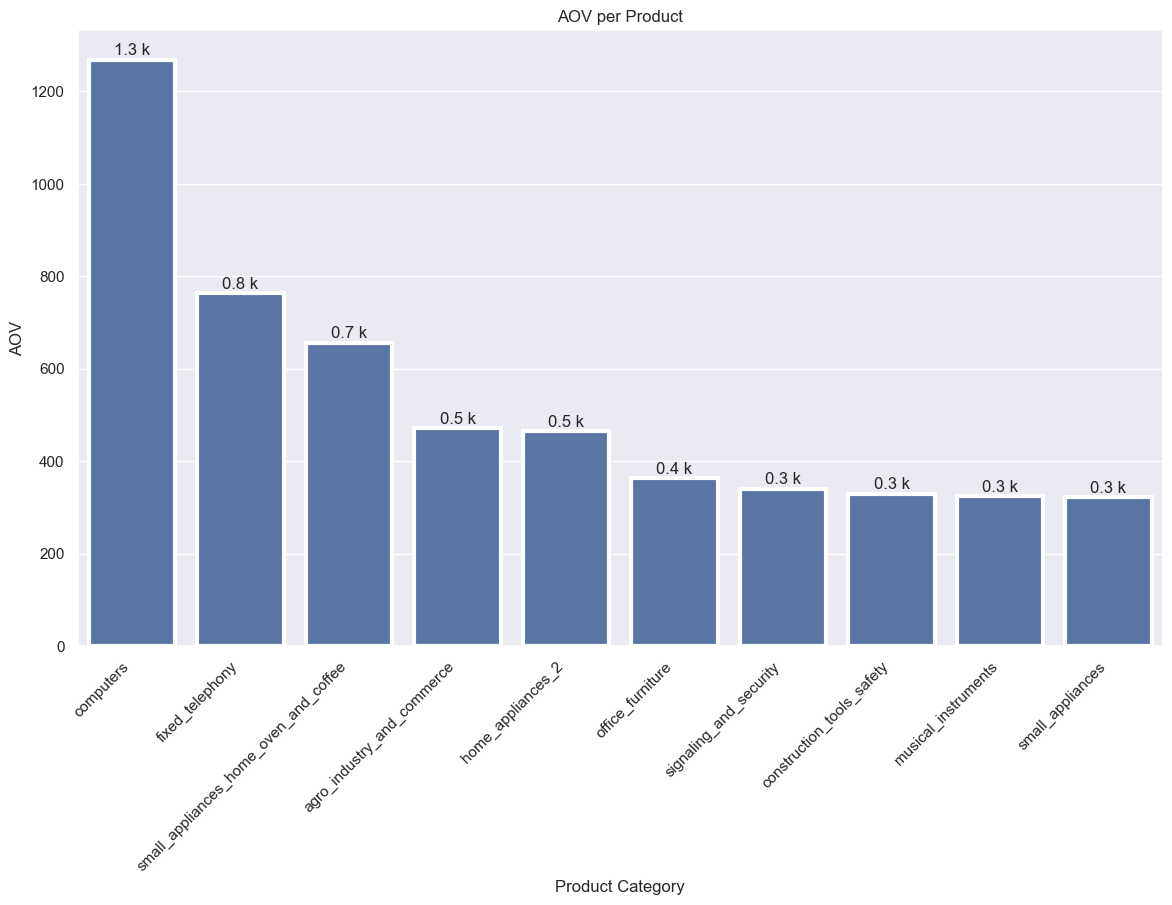

In [43]:
sns.set(rc={'figure.figsize':(14,8)})
ax=sns.barplot(data = order_pivot, x='product_category_name_english', y='aov', lw=3,
            order=order_pivot.sort_values('aov', ascending=False).head(10)['product_category_name_english'])
plt.title('AOV per Product')
plt.xlabel('Product Category')
# plt.xticks(rotation=45)
plt.ylabel('AOV')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10,
            f'{round(height/1000,1):,} k', ha="center")

plt.show()

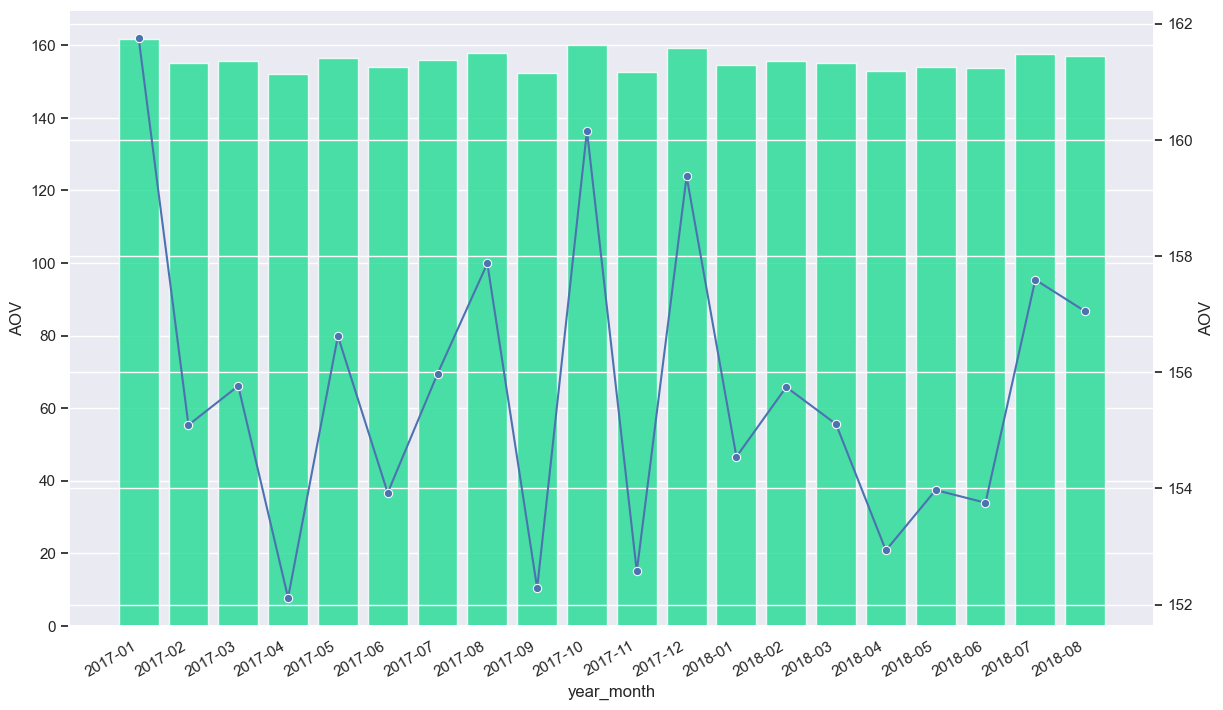

In [41]:
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(14,8))

sns.barplot(x=order_pivot['aov'], y=aov['AOV'], alpha=0.8, ax=ax1, color='mediumspringgreen')

ax2 = ax1.twinx()
sns.lineplot(x=aov['year_month'], y=aov['AOV'], marker='o', ax=ax2)

for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

### Nomor 6

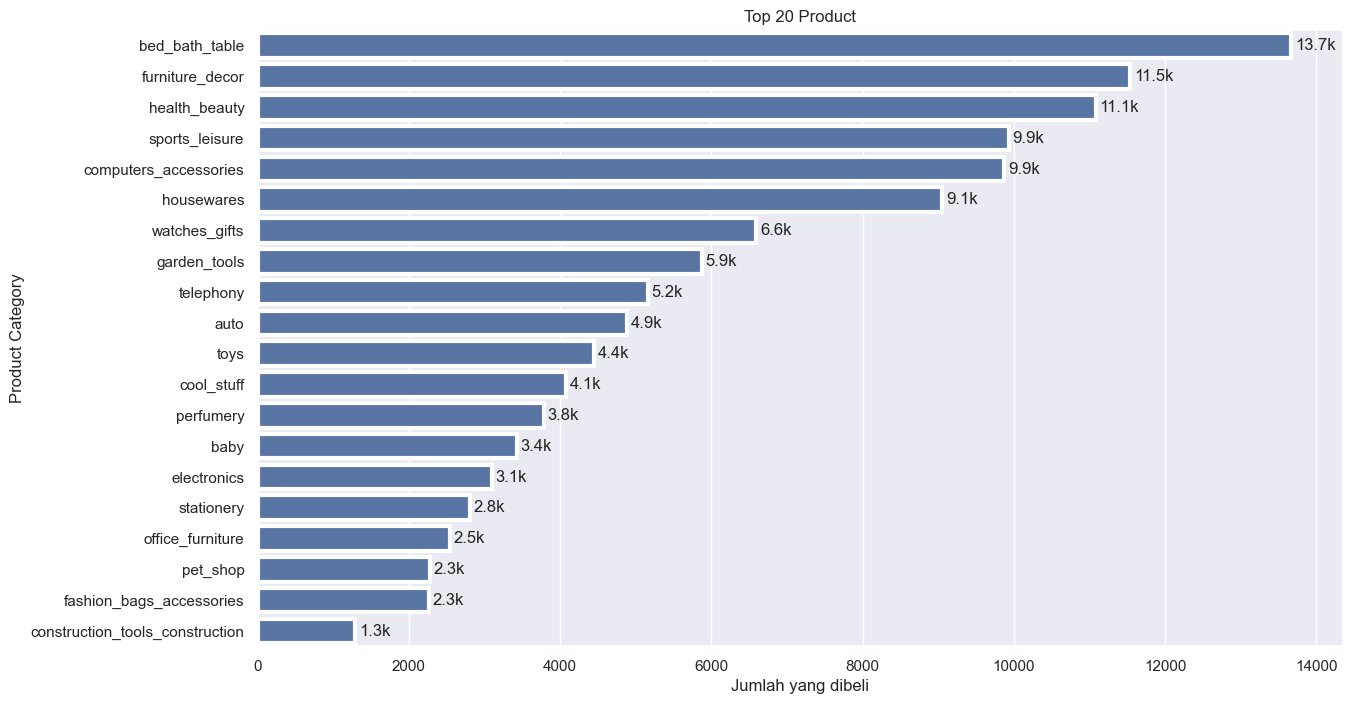

In [42]:
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.barplot(data=product_top, y='product_category_name_english', x='order_item_id', lw=3, orient='h',
            order=product_top.sort_values('order_item_id', ascending=False).head(20)['product_category_name_english'])
plt.title('Top 20 Product')
plt.xlabel('Jumlah yang dibeli')
# plt.xticks(rotation=45)
plt.ylabel('Product Category')

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 50, p.get_y() + p.get_height() / 2,
            f'{round(width/1000,1):}k', 
            va='center')

plt.show()

## Nomor 7

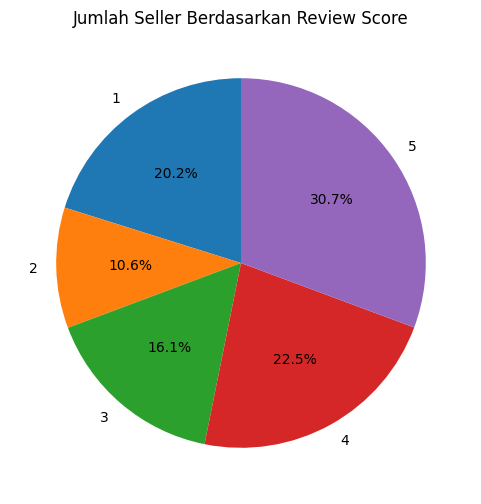

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(rating_pivot['seller_id'], labels=rating_pivot['review_score'],autopct='%1.1f%%', startangle=90)
plt.title('Jumlah Seller Berdasarkan Review Score')

plt.show()

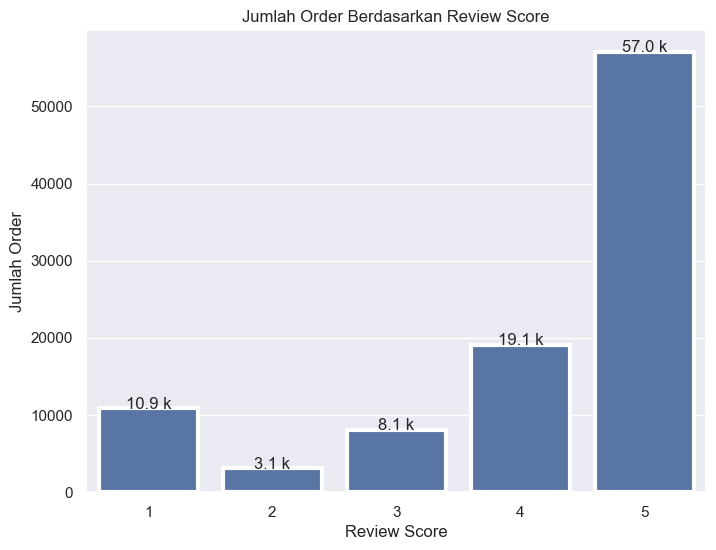

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='review_score', y='order_id', data=rating_pivot, lw=3)
plt.xlabel('Review Score')
plt.ylabel('Jumlah Order')
plt.title('Jumlah Order Berdasarkan Review Score')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{round(height/1000,1):,} k', ha="center")

plt.show()

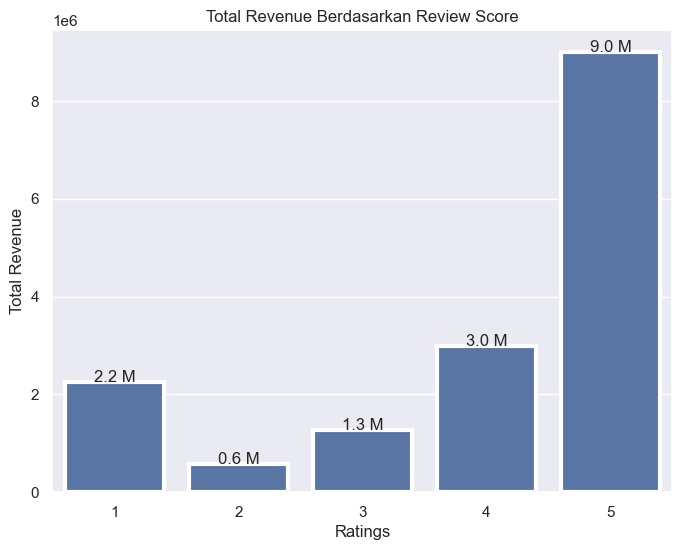

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='review_score', y='payment_value', data=rating_pivot, lw=3)
plt.xlabel('Ratings')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Berdasarkan Review Score')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1,
            f'{round(height/1000000,1):,} M', ha="center")


plt.show()

## RFM Segmentation

In [44]:
rfm_data = pd.merge(orders_df[['customer_id', 'order_id', 'order_purchase_timestamp']], order_payments_df[['order_id', 'payment_value']],
                      how='left', left_on='order_id', right_on='order_id')


In [26]:
# rfm_data = pd.pivot_table(rfm_data,
#                values=['payment_value'],
#                index=['order_id', 'customer_id', 'order_purchase_timestamp'],
#                aggfunc={'payment_value': 'sum'}, fill_value=0).reset_index()

In [45]:
rfm_data['order_purchase_timestamp'] = pd.to_datetime(rfm_data['order_purchase_timestamp'])

In [46]:
rfm_data

,customer_id,order_id,order_purchase_timestamp,payment_value
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12
1,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00
2,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59
3,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
4,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12
...,...,...,...,...
103882,39bd1228ee8140590ac3aca26f2dfe00,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,85.08
103883,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,195.00
103884,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,271.01
103885,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,441.16


In [47]:
def summary_data_from_transaction_data2(data, customer_id, order_purchase_timestamp, monetary_value_col):
    # Calculate Recency
    NOW = rfm_data[order_purchase_timestamp].max()
    data['DaysSinceLastPurchase'] = (NOW - data[order_purchase_timestamp]).dt.days

    # Aggregate data on customer ID
    aggr = {
        'DaysSinceLastPurchase': lambda x: x.min(),  # Recency
        order_purchase_timestamp: 'count',           # Frequency
        monetary_value_col: 'sum'                  # Monetary Value
    }
    
    rfm = data.groupby(customer_id).agg(aggr).reset_index()
    
    # Rename columns for clarity
    rfm.rename(columns={'DaysSinceLastPurchase': 'Recency', 
                       order_purchase_timestamp: 'Frequency',
                       monetary_value_col: 'MonetaryValue'}, inplace=True)
    return rfm

rfm_value = summary_data_from_transaction_data2(rfm_data, 'customer_id', 'order_purchase_timestamp', 'payment_value')

In [48]:
rfm_value

,customer_id,Recency,Frequency,MonetaryValue
0,00012a2ce6f8dcda20d059ce98491703,337,1,114.74
1,000161a058600d5901f007fab4c27140,458,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,596,1,195.42
3,0002414f95344307404f0ace7a26f1d5,427,1,179.35
4,000379cdec625522490c315e70c7a9fb,198,1,107.01
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,202,3,81.36
99437,fffeda5b6d849fbd39689bb92087f431,148,1,63.13
99438,ffff42319e9b2d713724ae527742af25,126,1,214.13
99439,ffffa3172527f765de70084a7e53aae8,410,1,45.50


In [49]:
rfm_value = rfm_value[['Frequency', 'Recency', 'MonetaryValue']]

In [50]:
from sklearn.preprocessing import StandardScaler

sc_data = StandardScaler()
data_std = sc_data.fit_transform(rfm_value)

In [51]:
data_std = pd.DataFrame(data_std, columns=rfm_value.columns)
data_std.head()

,Frequency,Recency,MonetaryValue
0,-0.117299,0.306507,-0.208375
1,-0.117299,1.093926,-0.421621
2,-0.117299,1.991974,0.155131
3,-0.117299,0.892190,0.082728
4,-0.117299,-0.598049,-0.243202


<Axes: >

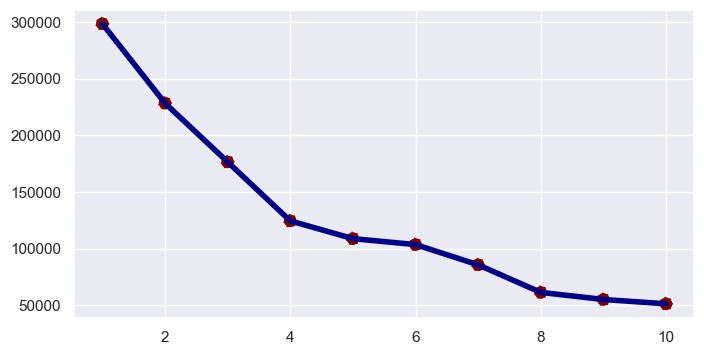

In [52]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=100, color='#800000',  linestyle='--')

nilai k = 4 menjadi nilai terbaik

In [53]:
kmeans = KMeans(n_clusters=4, random_state=0)

# fit model 
kc = kmeans.fit(data_std.values)
cluster_labels = kc.labels_

# add cluster
data_cluster = data_std.assign(K_Cluster = cluster_labels)
data_cluster.head()

,Frequency,Recency,MonetaryValue,K_Cluster
0,-0.117299,0.306507,-0.208375,1
1,-0.117299,1.093926,-0.421621,1
2,-0.117299,1.991974,0.155131,1
3,-0.117299,0.892190,0.082728,1
4,-0.117299,-0.598049,-0.243202,3


In [54]:
# add label to 'data' dataframe
data_label = rfm_value.assign(K_Cluster = cluster_labels)
data_label.head()

,Frequency,Recency,MonetaryValue,K_Cluster
0,1,337,114.74,1
1,1,458,67.41,1
2,1,596,195.42,1
3,1,427,179.35,1
4,1,198,107.01,3


C:\Users\mvr\AppData\Local\Temp\ipykernel_7952\3624797003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_label['K_Cluster'], y=data_label[data_label.columns[col]], palette='viridis')
C:\Users\mvr\AppData\Local\Temp\ipykernel_7952\3624797003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_label['K_Cluster'], y=data_label[data_label.columns[col]], palette='viridis')
C:\Users\mvr\AppData\Local\Temp\ipykernel_7952\3624797003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_label['K_Cluster'], y=data_label[d

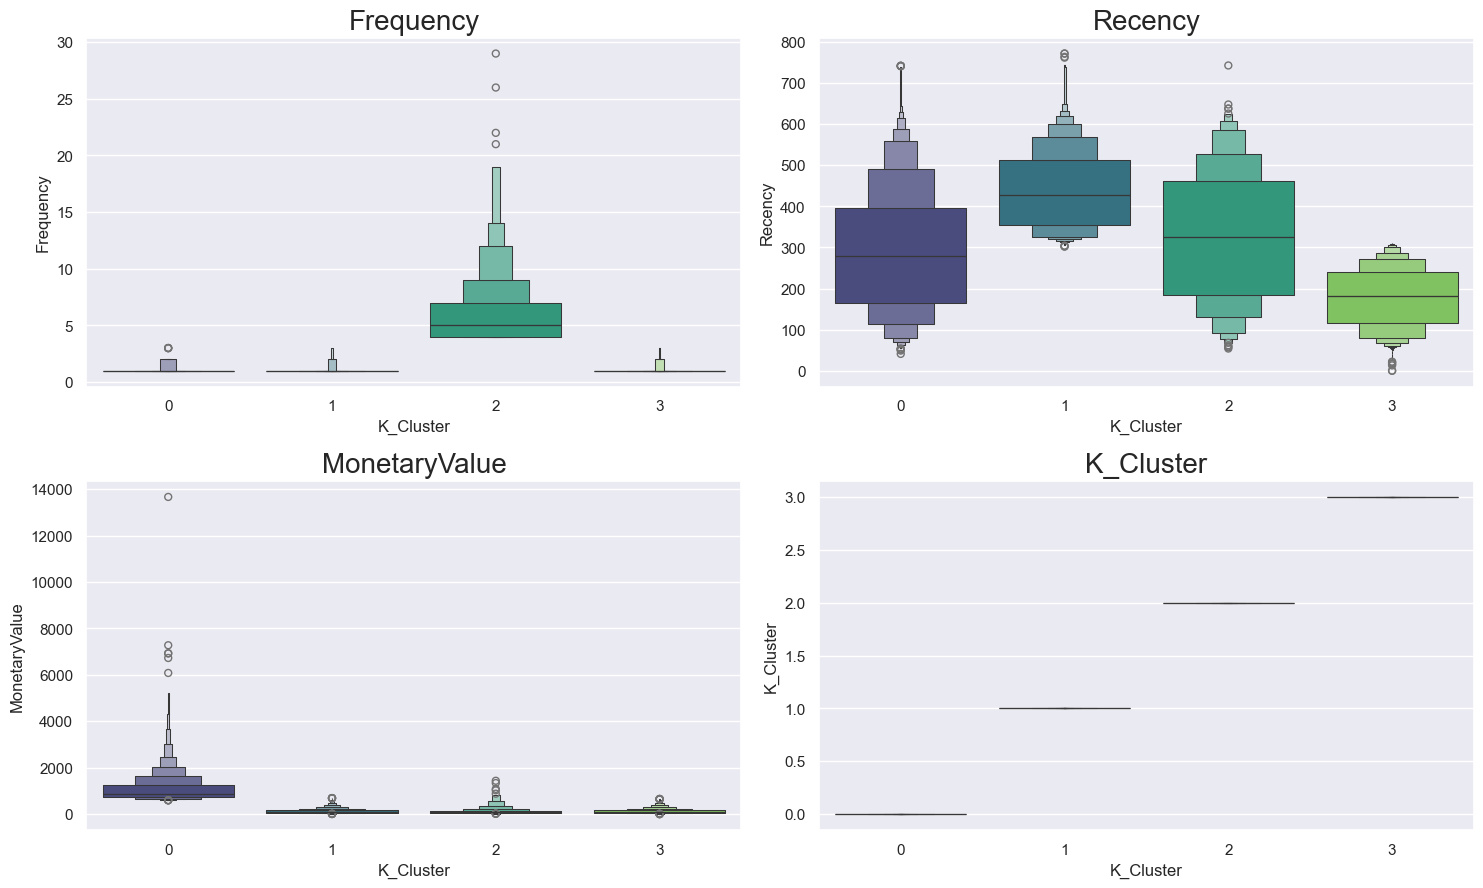

In [55]:
plt.figure(figsize=(15,13))
for col in range(0, len(data_label.columns)):
    plt.subplot(3,2,col+1)
    sns.boxenplot(x=data_label['K_Cluster'], y=data_label[data_label.columns[col]], palette='viridis')
    plt.title(data_label.columns[col], fontsize=20)
    plt.tight_layout()

In [56]:
rfm_value.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,99441.0,1.044710,0.381164,1.0,1.00,1.00,1.00,29.00
Recency,99441.0,289.900192,153.667316,0.0,166.00,271.00,400.00,772.00
MonetaryValue,99441.0,160.988648,221.950728,0.0,62.01,105.29,176.97,13664.08


In [57]:
rfm_values = rfm_value.abs()

In [58]:
# set the bins [<min, x, x, max]
r_bins = [-1, 0, 400, 772]
f_bins = [-1, 0, 1, 29]
m_bins = [-1, 0, 176.97, 13664.08]
rfm_values['r_score'] = pd.cut(rfm_values['Recency'], r_bins, labels = [3, 2, 1])
rfm_values['f_score'] = pd.cut(rfm_values['Frequency'], f_bins, labels = [1, 2, 3])
rfm_values['m_score'] = pd.cut(rfm_values['MonetaryValue'], m_bins, labels = [1, 2, 3])

In [59]:
rfm_values['r_score'] = rfm_values['r_score'].astype(int)
rfm_values['f_score'] = rfm_values['f_score'].astype(int)
rfm_values['m_score'] = rfm_values['m_score'].astype(int)

rfm_values['rfm_score'] = rfm_values[['r_score', 'f_score', 'm_score']].sum(axis=1)

In [60]:
rfm_values.head()

,Frequency,Recency,MonetaryValue,r_score,f_score,m_score,rfm_score
0,1,337,114.74,2,2,2,6
1,1,458,67.41,1,2,2,5
2,1,596,195.42,1,2,3,6
3,1,427,179.35,1,2,3,6
4,1,198,107.01,2,2,2,6


In [61]:
rfm_values['rfm_score'].unique()

array([6, 5, 7, 8, 4], dtype=int64)

In [62]:
rfm_values['rfm_group'] = np.where(rfm_values['rfm_score']==8,'Champions',
                         np.where(rfm_values['rfm_score']==7,'Potential Loyalists',
                         np.where(rfm_values['rfm_score']==6,'New Customers','At Risk Customers')))

pd.DataFrame(rfm_values['rfm_group'].value_counts())

,count
rfm_group,
New Customers,60932
Potential Loyalists,20052
At Risk Customers,17947
Champions,510


In [63]:
rfm_datas_agg = rfm_values.groupby('rfm_group').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
rfm_datas_agg.head()

Recency Frequency MonetaryValue       
                       mean      mean          mean  count
rfm_group                                                 
At Risk Customers     504.2       1.0          85.9  17947
Champions             217.3       2.4         418.5    510
New Customers         249.7       1.0         117.1  60932
Potential Loyalists   222.0       1.1         355.0  20052

In [64]:
rfm_datas_agg.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in rfm_datas_agg.columns]
rfm_datas_agg = rfm_datas_agg.reset_index()
rfm_datas_agg['pctg'] = rfm_datas_agg['MonetaryValue_count']/rfm_datas_agg['MonetaryValue_count'].sum()*100
rfm_datas_agg

,rfm_group,Recency_mean,Frequency_mean,MonetaryValue_mean,MonetaryValue_count,pctg
0,At Risk Customers,504.2,1.0,85.9,17947,18.047888
1,Champions,217.3,2.4,418.5,510,0.512867
2,New Customers,249.7,1.0,117.1,60932,61.274525
3,Potential Loyalists,222.0,1.1,355.0,20052,20.164721


In [65]:
import squarify

In [66]:
rfm_datas_agg

,rfm_group,Recency_mean,Frequency_mean,MonetaryValue_mean,MonetaryValue_count,pctg
0,At Risk Customers,504.2,1.0,85.9,17947,18.047888
1,Champions,217.3,2.4,418.5,510,0.512867
2,New Customers,249.7,1.0,117.1,60932,61.274525
3,Potential Loyalists,222.0,1.1,355.0,20052,20.164721


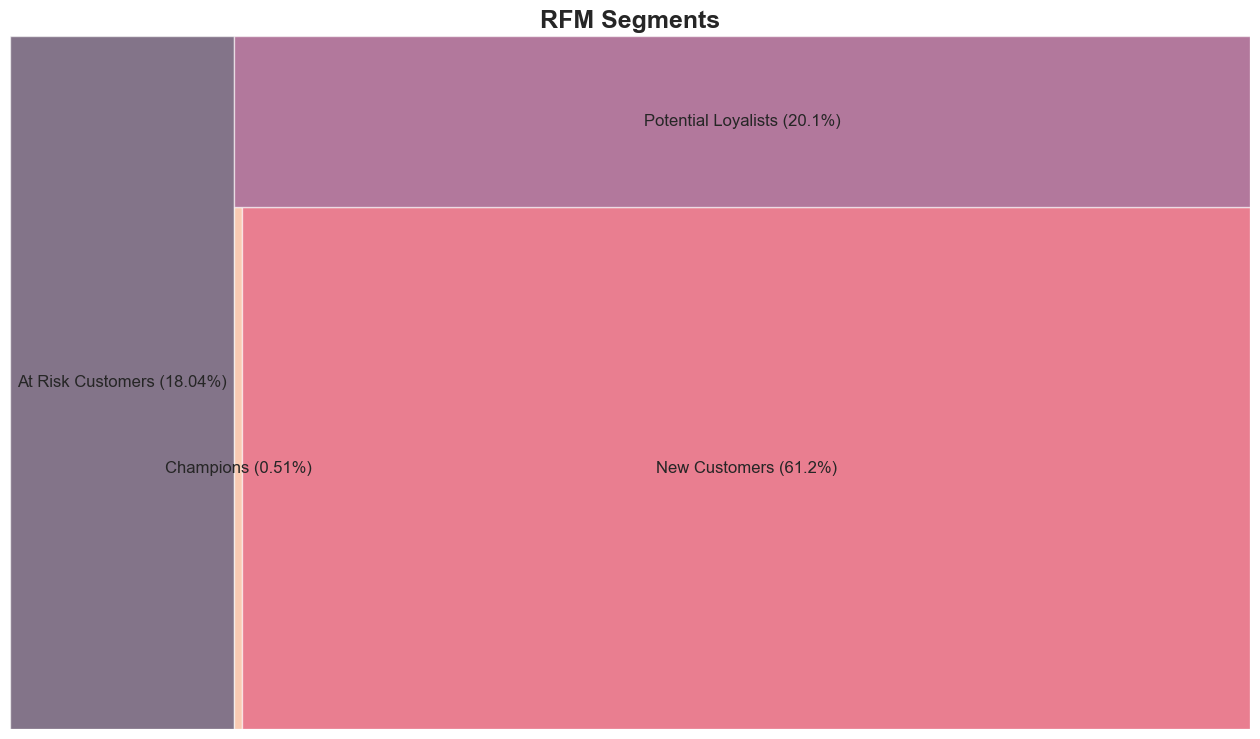

In [70]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_datas_agg['MonetaryValue_count'], 
              label=['At Risk Customers (18.04%)',
                     'Champions (0.51%)',
                     'New Customers (61.2%)',
                     'Potential Loyalists (20.1%)'], alpha=.6 )

plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()